In [1]:
import pandas as pd
import glob
import os

In [32]:

import pandas as pd

# Specify the directory containing the CSV files
input_directory = '../data/individualAOImetrics/'  # Update with your directory path
output_file = '../data/timecards/combined_timecard_3seconds.csv'  # Output file name
dropped_AOI = []
# Initialize an empty list to store the processed rows from all files
all_processed_rows = []

# Use glob to find all CSV files in the directory
for file_path in glob.glob(os.path.join(input_directory, '*.csv')):
    # Load each CSV file into a DataFrame, skipping the first 7 rows
    df = pd.read_csv(file_path, skiprows=7)
    
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        study = row["Study Name"]
        start = row['Start']
        type = row['Type']
        duration = row['Duration (ms)']
        label = row['Label']
        respondent = int(row['Respondent Name'])
        
        #Simplify naming convention
        if "easy 1" in study:
            study = "Bridge 1"
        elif "easy 2" in study:
            study = "Bridge 2"
        elif "hard 1" in study:
            study = "Bridge 3"
        elif "hard 2" in study:
            study = "Bridge 4"
        
        # Process each row based on the criteria provided
        if type == "Stimulus":
            new_start = start
            new_end = start + duration
        # if study == "Bridge 1" and respondent == 20017 and "crack 14" in label.lower():
        #     print(duration, start)
        if "hit" in label.lower():
            if duration > 4500:
                new_end = start + duration - 1500  # Trim the last 1.5s
                new_start = new_end - 3000
            else:
                new_start = start  # If duration ≤ 4.5s, keep the full range
                new_end = start + duration - 1500
        else:
            if duration > 3500:  # Ensure at least 3s remains after removing 0.5s
                new_end = start + duration - 500 # Trim the last 0.5s
                new_start = new_end - 3000  # Keep latest 3s, but not beyond the start
            else:
                new_start = start  # If duration ≤ 3.5s, keep the full range
                new_end = start + duration - 500 
            # if duration > 3000:  # If duration is greater than 3s, extract middle 3s
            #     middle_start_offset = (duration - 3000) // 2  # Offset to start middle 3s
            #     new_start = start + middle_start_offset
            #     new_end = new_start + 3000
            # else:
            #     new_start = start  # If duration ≤ 3s, keep the full range
            #     new_end = start + duration

        # if study == "Bridge 1" and respondent == 20017 and "crack 14" in label.lower():
        #     print(new_start, new_end)
                    
        # Append the processed data to the combined list
        if new_start >=new_end:
            # if study == "Bridge 1" and respondent == 20017 and "crack 14" in label.lower():
            #     print("yes")
            dropped_AOI.append((study, respondent, label))
            continue
        all_processed_rows.append([study, respondent, new_start, new_end, label])

# Convert the combined processed data into a DataFrame
combined_df = pd.DataFrame(all_processed_rows, columns=["Study Name", 'Respondent', 'Start', 'End', 'Label'])

# Sort by "Study Name" first in the specified order, then by "Respondent" numerically
study_order = ["Bridge 1", "Bridge 2", "Bridge 3", "Bridge 4"]
combined_df['Study Name'] = pd.Categorical(combined_df['Study Name'], categories=study_order, ordered=True)
combined_df = combined_df.sort_values(by=['Study Name', 'Respondent'])

# Save the combined data to a single CSV file
combined_df.to_csv(output_file, index=False)

print(f"Combined data saved to {output_file}")
# print(dropped_AOI)
print(len(dropped_AOI))
print(len(dropped_AOI)/len(combined_df))

Combined data saved to ../data/timecards/combined_timecard_3seconds.csv
107
0.03084462381089651


In [30]:
#verification
file_path = '../data/timecards/combined_timecard_5seconds_middle.csv'

df = pd.read_csv(file_path, skiprows=0)
    
# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    start = row['Start']
    end = row["End"]
    label = row["Label"]
    if round(end-start, 2)> 3000.0 and "screen" not in label.lower():
        print(row)

Study Name       Bridge 1
Respondent          20002
Start           104936.07
End             108236.07
Label         Crack 1 Hit
Name: 1, dtype: object
Study Name       Bridge 1
Respondent          20002
Start            111953.9
End              116953.9
Label         Crack 2 Hit
Name: 2, dtype: object
Study Name       Bridge 1
Respondent          20002
Start           128677.52
End             132727.52
Label         Crack 3 Hit
Name: 3, dtype: object
Study Name       Bridge 1
Respondent          20002
Start           139106.03
End             143906.03
Label         Crack 4 Hit
Name: 4, dtype: object
Study Name     Bridge 1
Respondent        20002
Start         166580.04
End           171580.04
Label            Base 1
Name: 6, dtype: object
Study Name        Bridge 1
Respondent           20002
Start            223519.07
End              228519.07
Label         Crack 12 Hit
Name: 7, dtype: object
Study Name     Bridge 1
Respondent        20002
Start         238686.19
End           2

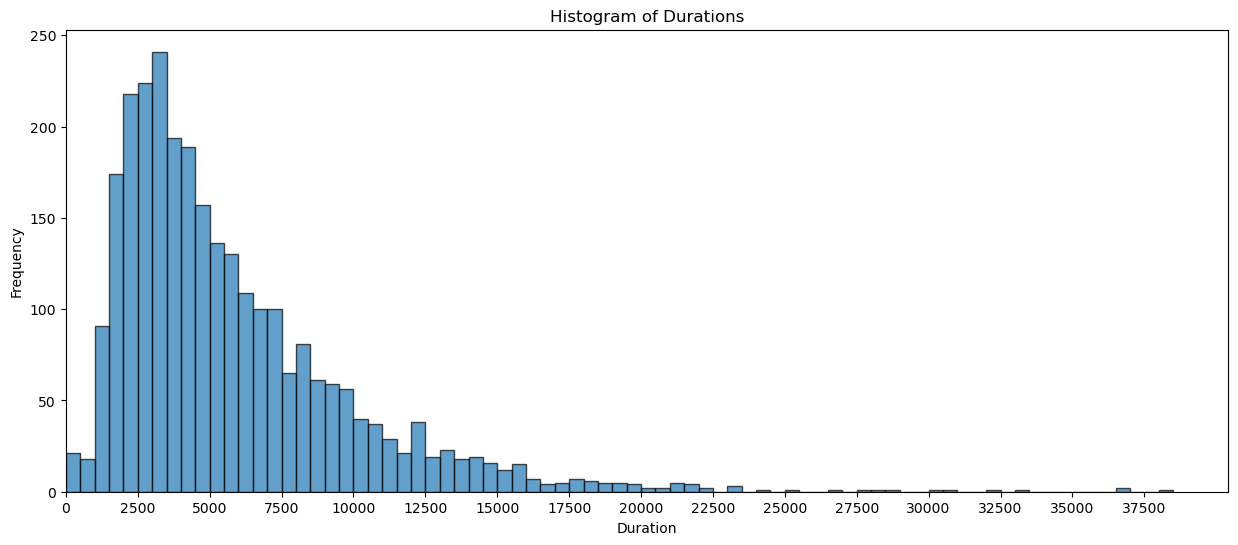

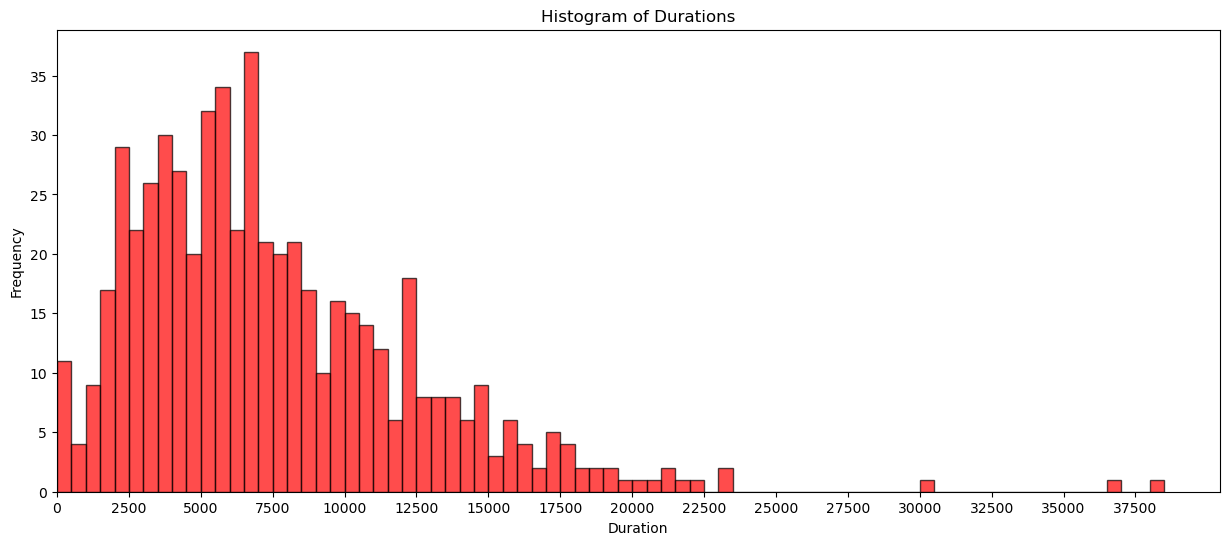

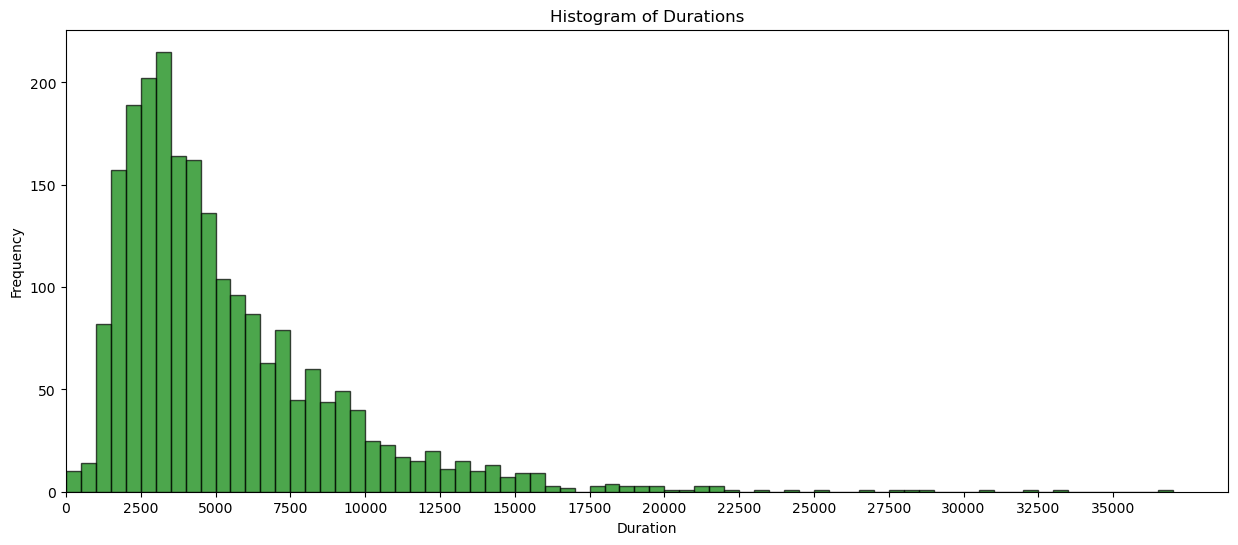

In [74]:

#Visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Specify the directory containing the CSV files
input_directory = 'data/individualAOImetrics/'  # Update with your directory path
duration_list = []
duration_miss =[]
duration_hit=[]
# Use glob to find all CSV files in the directory
for file_path in glob.glob(os.path.join(input_directory, '*.csv')):
    # Load each CSV file into a DataFrame, skipping the first 7 rows
    df = pd.read_csv(file_path, skiprows=7)
    
    # Iterate through each row in the DataFrame
    for index, row in df.iterrows():
        type = row['Type']
        duration = row['Duration (ms)']
        label = row['Label']
    
        # Process each row based on the criteria provided
        if type == "Stimulus":
            continue
        if "base" in label.lower():
            continue
        else:
            duration_list.append(duration)
            if "miss" in label.lower():
                duration_miss.append(duration)
            if "hit" in label.lower():
                duration_hit.append(duration)
    
# Plot histogram
# Define bin edges with a step of 500ms
bin_edges = np.arange(0, max(duration_list) + 500, 500)
plt.figure(figsize=(15, 6))
plt.hist(duration_list, bins=bin_edges, edgecolor='black', alpha=0.7)

# Set x-axis limits to only positive values
plt.xlim(left=0)  # Ensure the left limit starts from 0

# Set x-axis ticks every 2500 instead of 5000
plt.xticks(np.arange(0, max(duration_list) + 1, 2500))
# Labels and title
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Durations")

# Show the plot
plt.show()

bin_edges = np.arange(0, max(duration_miss) + 500, 500)
plt.figure(figsize=(15, 6))
plt.hist(duration_miss, bins=bin_edges, color = "red", edgecolor='black', alpha=0.7)

# Set x-axis limits to only positive values
plt.xlim(left=0)  # Ensure the left limit starts from 0

# Set x-axis ticks every 2500 instead of 5000
plt.xticks(np.arange(0, max(duration_miss) + 1, 2500))
# Labels and title
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Durations")

# Show the plot
plt.show()

bin_edges = np.arange(0, max(duration_hit) + 500, 500)
plt.figure(figsize=(15, 6))
plt.hist(duration_hit, bins=bin_edges, color = "green", edgecolor='black', alpha=0.7)

# Set x-axis limits to only positive values
plt.xlim(left=0)  # Ensure the left limit starts from 0

# Set x-axis ticks every 2500 instead of 5000
plt.xticks(np.arange(0, max(duration_hit) + 1, 2500))
# Labels and title
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Histogram of Durations")

# Show the plot
plt.show()

In [2]:
# # Load the CSV file into a DataFrame
# df = pd.read_csv('IndividualAOImetrics.csv', skiprows=7)


# # Initialize an empty list to store the processed rows
# processed_rows = []

# # Iterate through each row in the DataFrame
# for index, row in df.iterrows():
#     start = row['Start']
#     type = row['Type']
#     duration = row['Duration (ms)']
#     label = row['Label']
#     respondent=row['Respondent Name']
    
#     #Screen recording time is dedicated for each participant
#     if type == "Stimulus":
#         new_start = start
#         end_time = start + duration
    
#     #Duration is under 
#     elif duration < 3500:
#         new_start = start
#         end_time = start + duration - 500
        
#     #Duration is longer than 3000 milliseconds so cutting off the excess
#     else:
#         end_time = start + duration - 500
#         new_start = end_time - 3000  # Set start time 3 seconds before the end time

#     # Append the processed data to the list
#     processed_rows.append([respondent, new_start, end_time, label])

# # Convert the processed data into a DataFrame
# processed_df = pd.DataFrame(processed_rows, columns=['Respondent', 'Start', 'End', 'Label'])

# # Save the processed data to a new CSV file
# processed_df.to_csv('timecard.csv', index=False)
